# Regularization과 Normalization
Regularization과 Normalization 이 두 개념은 서로 헷갈리는 경우가 많은 것 같습니다. 한국어로 번역할 때 두 개념이 다 '정규화'로 번역될 때가 많아서 더욱 혼란스러울 때가 많습니다. 우선 두 개념을 아래와 같이 정리해 보겠습니다.

## Regularization(정칙화)
정칙화라고 불리며, 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나입니다. 오늘 우리가 가장 중요하게 다룰 주제이기도 하지요. L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다. 오버피팅은 한국어로 과적합이라고 하며, train set은 매우 잘 맞히지만, validation/test set은 맞히지 못하는 현상을 말합니다. 비유하자면 오버피팅은 기출문제는 외워서 잘 맞히지만 새로운 응용 문제로 시험을 볼 때는 잘 풀지 못하는 경우라고 할 수 있겠습니다. 더 좋은 결과를 얻기 위해서는 새로운 시험, 즉 test set에서도 잘 맞혀야겠죠? 그래서 regularization 기법들은 모델에 제약 조건을 걸어서 모델의 train loss를 증가시키는 역할을 합니다. 그래서 train loss는 약간 증가하지만 결과적으로, validation loss나 최종 test loss를 감소시키려는 목적을 가지고 있지요.

## Normalization(정규화)
정규화라고 불리며, 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정입니다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다. 예를 들어, 금액과 같은 큰 범위의 값(10,000 ~ 10,000,000)과 시간(0~24)의 값이 들어가는 경우, 데이터의 분포가 피처(feature) 값의 범위에 의해 왜곡되어 학습에 방해가 된다는 문제가 있습니다. normalization은 모든 피처 값의 범위를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

이 두 가지 단어는 한국어로 번역 시에 혼용하여 쓰기도 하므로, 앞으로 이번 노드에서는 주로 영어로 표기하도록 하겠습니다. 핵심을 정리하면, regularization은 오버피팅을 막고자 하는 방법, normalization은 트레이닝을 할 때에 서로 범위가 다른 데이터들을 같은 범위로 바꿔주는 전처리 과정이라는 것입니다.

Regularization와 Normalization의 간단한 예제를 Iris dataset의 회귀 문제를 풀면서 비교해 보겠습니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


값으로만 보니 직관적으로 잘 와닿지 않네요! 산점도로 그려봅시다.

아직 normalization을 하지 않았기 때문에 x축과 y축은 각각의 최솟값과 최댓값의 범위로 그려집니다.

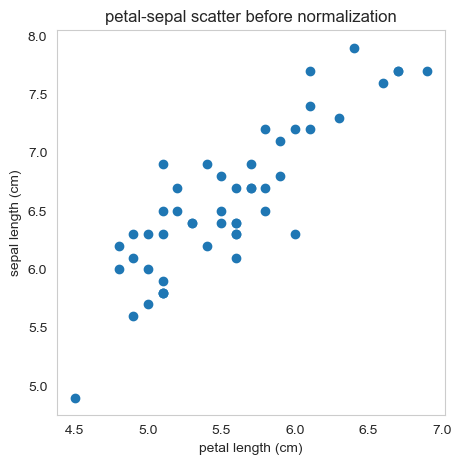

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

그래프의 축을 잘 살펴보세요!

이제 0-1로 normalization을 해주는 minmax_scale를 이용해서 산점도를 다시 한번 그려보겠습니다.

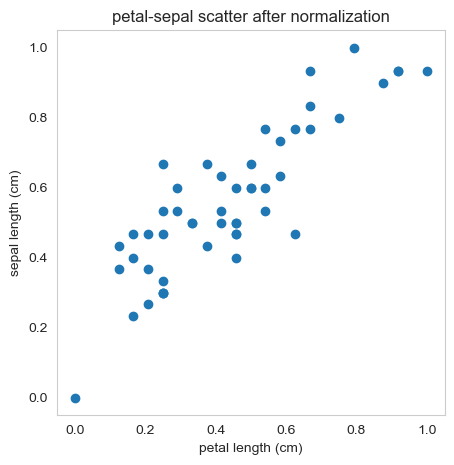

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

결과를 비교해 보면, 가장 큰 값을 1, 가장 작은 값을 0으로 하여 축 범위가 바뀜을 확인할 수 있습니다. 데이터의 상대적인 분포는 바뀌지 않았지만, 피처의 스케일이 0과 1 사이로 변환되었으므로 이후 X, Y의 관계를 다루기 용이해졌습니다.

이번엔 같은 데이터로 간단한 회귀 문제를 풀면서 regularization에 대해 알아보겠습니다.

sklearn.linear_model에 포함된 LinearRegression 모델을 사용하여 X-Y 관계를 선형으로 모델링해 보겠습니다. 이 sklearn.linear_model에는 L1, L2 regression인 Lasso와 Ridge 모델도 함께 포함되어 있으므로, 이들의 차이점을 먼저 직관적으로 이해해 보겠습니다. 수학적 정의나 보다 구체적인 설명은 다음 스텝에 이어집니다.

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


위에서 linear regression으로 구한 기울기와 절편을 가지고 일차함수를 만들어 산점도와 함께 그려보겠습니다.

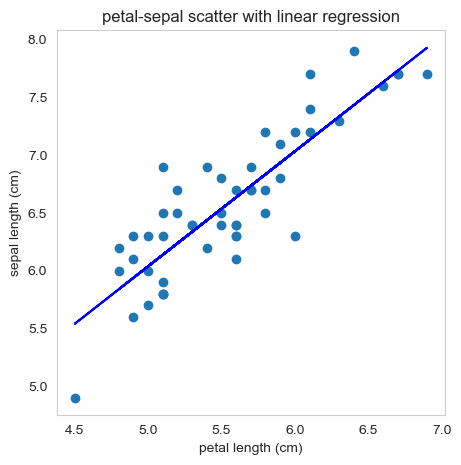

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 L1, L2 regularization으로 regression을 해보겠습니다. 이는 Lasso, Ridge라고 부릅니다.

먼저 L1 regularization인 Lasso로 문제를 풀어보겠습니다.

기울기 : 0.00, 절편 : 6.59


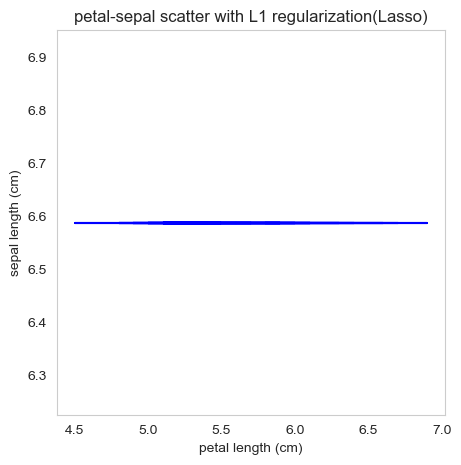

In [7]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.plot(X, L1.predict(X.reshape(-1, 1)), '-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

어떤가요? 혹시 기울기가 0으로 나오지 않았나요? Lasso 방법은 결과가 별로 좋지 않은 것 같습니다.

이제 같은 데이터셋으로 L2 regularization인 Ridge로 문제를 풀어보고 서로 비교해 보겠습니다.

기울기 : 0.00, 절편 : 1.41


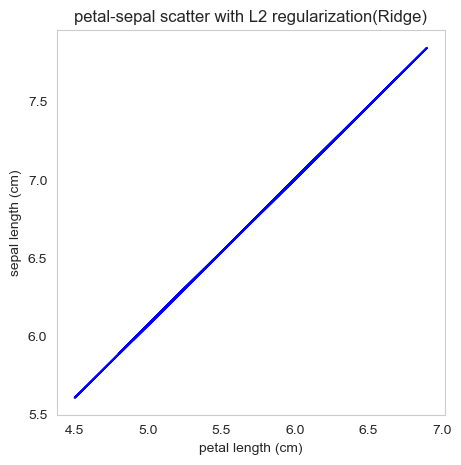

In [8]:
# Q. linear regression의 코드를 참고하여, 아래 코드를 채워주세요!

# L2 regularization은 Ridge로 import 합니다.
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1, 1), Y)
a, b = L1.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.plot(X, L2.predict(X.reshape(-1, 1)), '-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

다시 다루겠지만, linear regression이 L2 norm과 관련이 있습니다. 그래서 L2 regularization을 쓰는 Ridge방법으로는 앞서 linear regression과 큰 차이가 없는 결과가 나옵니다.
그러나 왜 L1 regularization을 쓰는 Lasso에서는 이상한 결과가 나왔을까요?

다음 스텝에서 그 이유를 알아보도록 하겠습니다!

## L1 Regularization
이전 스텝에서 regularization과 normalization의 정의를 설명하고, L1/L2 regularization을 코드로 맛보기 해보았습니다. 마지막에 같은 linear regression 문제를 푸는데 L1 regularization에서는 문제가 풀리지 않았다는 것을 기억하시나요?

L1 regularization을 설명하면서, 지난 스텝에서 `Lasso`로는 regression 문제가 제대로 풀리지 않았던 현상을 더 자세히 알아보겠습니다. 그리고 어떤 때에 L1 regularization을 사용하는지 알아보는 것이 목표입니다!

### L1 regularization (Lasso)의 정의
L1 regularization은 아래와 같은 식으로 정의됩니다. ($N$: 데이터의 개수, $D$: 데이터의 차원(feature의 개수))

$$  \hat{\beta}^{lasso} := argmin_{\beta} \frac{1}{2N} \sum_{i=1}^{N}(y_i - \beta_0 - \sum_{j=1}^{D}x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^{D} \left| \beta_j \right| $$

여기서 중요하게 봐야 할 부분은 $\lambda\sum_{j=1}^{D} \left| \beta_j \right|$입니다. 이 부분이 없다면 linear regression과 동일합니다

이 부분이 바로 L1 norm에 해당하는 부분인데, L1 regularization이라는 이름이 붙은 이유이기도 하고, L2 regularization과의 차이가 나타나는 중요한 부분입니다.

>💡참고 지식 (Lp norm)

>norm은 벡터나 행렬, 함수 등의 거리를 나타내는 것으로 우리는 여기서 벡터값만 다룰 예정입니다. Lp norm 의 정의는 아래와 같습니다.      
>    (참고) Norm (mathematics)(https://en.wikipedia.org/wiki/Norm_(mathematics))

$$ \left\| x\right\|_p := (\sum_{i=1}^{n}\left| x_i\right|^p)^{1/p} $$

norm에 대해서는 이후 스텝에서 더 자세히 다룰 예정입니다!

그렇다면
$p=1$인 경우의 L1 norm은 
$ \left\| x\right\|_1 := \sum_{i=1}^{n}\left| x_i\right| $ 로 나타낼 수 있습니다.
이는 위에서 봤던 $\lambda\sum_{j=1}^{D} \left| \beta_j \right|$ 에 들어가 있는 수식과 일치합니다!    


때문에 $p=1$이므로 L1 regularization이라고 부르는 것입니다.
하지만 사이킷런이나 케라스, 텐서플로우 등의 패키지에서는 `Lasso` 라는 이름을 더 자주 사용합니다. 그럼 저번 시간에 사용해 본 코드의 일부분을 살펴볼까요?

In [9]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


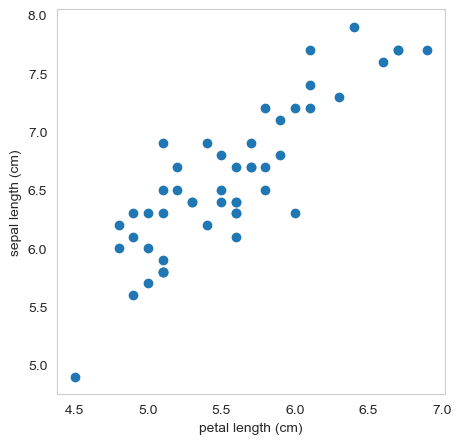

In [10]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


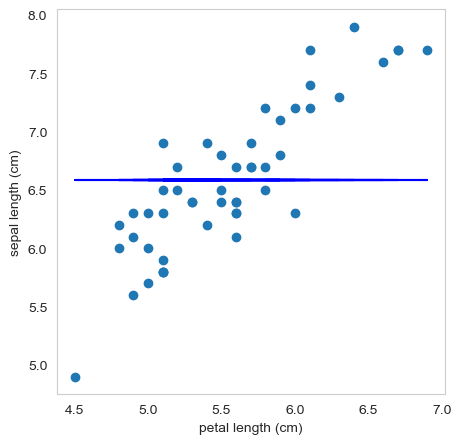

In [11]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

흠... 기울기가 0으로 나오는 것이 아무래도 이상한데요...🤔
아무래도 데이터의 feature 개수가 2개밖에 되지 않으니까 이게 맞는 건지 아직 잘 모르겠습니다. 일단 다른 데이터셋으로 L1 regularization을 한번 더 돌려보겠습니다.

### 컬럼 수가 많은 데이터에서의 L1 regularization 비교
Iris 데이터는 특성이 총 4개로 컬럼 수가 너무 적으니 wine dataset을 이용해 보겠습니다.
총 13개의 특성을 갖는 데이터입니다.

In [12]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [13]:
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 linear regression 으로 문제를 풀고, 그 계수(coefficient)와 절대 오차(mean absolute error), 제곱 오차(mean squared error), 평균 제곱값 오차(root mean squared error)를 출력해 보겠습니다.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722726
Mean Squared Error: 0.10624587409525657
Mean Root Squared Error: 0.32595379134971963


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


이번에는 L1 regularization으로 문제를 풀어보겠습니다.

In [16]:
# Q. 위의 Iris 예제 코드를 참고해서, 빈칸을 채워봅시다.

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("Result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

Result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.09559568945781889
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


### 결과 분석
coefficient 부분을 보시면 linear regression과 L1 regularization의 차이가 좀 더 두드러짐을 알 수 있습니다. linear regression에서는 모든 컬럼의 가중치가 0이 아닌 값을 가지고 있지만, L1 regularization에서는 총 13개 중 7개를 제외한 나머지의 값들이 모두 0임을 확인할 수 있습니다. error 부분에서는 큰 차이가 없었지만, 우리가 어떤 컬럼이 결과에 영향을 더 크게 미치는지 확실히 확인할 수 있습니다. 이러한 경우 다른 문제에서도 error의 차이가 크게 나지 않는다면, 차원 축소와 비슷한 개념으로 변수의 값을 7개만 남겨도 충분히 결과를 예측할 수 있습니다. 다만 linear regression과 L1, L2 regularization의 차이 중 하나는 하이퍼파라미터(수식에서는 𝜆)가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 점입니다.

## L2 Regularization
### L2 Regularization(Ridge)의 정의
L2 regularization은 아래와 같은 식으로 정의됩니다.

$$\hat{\beta}^{ridge} := argmin_{\beta} \frac{1}{2N} \sum_{i=1}^{N}(y_i - \beta_0 - \sum_{j=1}^{D}x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^{D} \beta_j^2$$

아래는 L1 regularization의 정의입니다.

$$  \hat{\beta}^{lasso} := argmin_{\beta} \frac{1}{2N} \sum_{i=1}^{N}(y_i - \beta_0 - \sum_{j=1}^{D}x_{ij}\beta_j)^2 + \lambda\sum_{j=1}^{D} \left| \beta_j \right| $$

자 이제 두 regularization 수식의 차이가 어디에 있는지 보이시나요? 이전 스텝에서 잠깐 Lp norm을 설명드렸는데, 그것이 L1 / L2 regularization의 이름과 큰 관련이 있다고 하였습니다.

L2 regularization에서는 $\lambda\sum_{j=1}^{D} \beta_j^2$ 부분이 핵심 내용이 됩니다.    
$\sum_{j=1}^{D} \beta_j^2 \leftarrow $ 이부분이 이전 스텝에서 설명해드린 L2 Norm의 형태와 똑같음을 확인할 수 있습니다

### L1 / L2 Regularization의 차이점
- 노션에 정리

![IMG](data/img.png)

In [17]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [18]:
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.2484576884176944
Mean Squared Error: 0.1026298911034127
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [19]:
# Q. L1 regularization 코드를 참고하여 아래 코드를 채워주세요.

from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05, max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.25114669599364287
Mean Squared Error: 0.10568076460795572
Mean Root Squared Error: 0.3250857803841253


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


iteration 값을 5로만 설정해 보아도, L2 regularization의 결과는 linear regression과 같은 값이 나오지만, L1 regularization에서는 앞 step과 같은 값을 확인할 수는 없었습니다. 심지어 수렴하지 않았다는 경고까지 나오는군요! 이는 아직 다른 조건들을 만족하는 답을 찾지 못하였다는 뜻입니다.

정리하면, L1 regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 차원 축소와 비슷한 역할을 하는 것이 특징이며, L2 regularization은 계수를 0으로 보내지는 않지만 제곱 텀이 있기 때문에 L1 regularization보다는 수렴 속도가 빠르다는 장점이 있습니다. 예를 들어, 
A=[1,1,1,1,1] , 
B=[5,0,0,0,0] 의 경우 L1-norm은 같지만, L2-norm은 같지 않습니다. 즉, 제곱 텀에서 결과에 큰 영향을 미치는 값은 더 크게, 결과에 영향이 적은 값들은 더 작게 보내면서 수렴 속도가 빨라지는 것입니다.

그러므로, 데이터에 따라 적절한 regularization 방법을 활용하는 것이 좋습니다.

## Extra : Lp norm
이전 스텝에서 잠깐 소개해드린 Lp norm에 대해 자세히 설명하겠습니다.
Norm이라는 용어는 벡터뿐만 아니라 함수, 행렬의 크기를 나타내는 개념으로, 딥러닝을 배우는 과정에서는 주로 벡터, 좀 더 어렵게는 행렬의 norm 정도만 알면 됩니다.

### Vector norm
L1 / L2 regularization에서 배운 norm은 벡터에서 정의된 norm으로 아래와 같습니다.

$$ \left\| x\right\|_p := (\sum_{i=1}^{n}\left| x_i\right|^p)^{1/p} $$

아래 코드에서 
p의 값과 
x의 형태를 바꾸어가며 실험해 보세요.

In [20]:
import numpy as np

In [21]:
# [Playground] x와 p를 바꾸어가며 norm 값이 어떻게 변하는지 실험해봅시다!
# --------------------------- #
x = np.array([1,10,1,1,1])
p = 5
# --------------------------- #

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00008 
result of making norm : 10.00008 


In [22]:
x = np.array([1,10,1,1,1])
p = 19

norm_x = np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.00000 
result of making norm : nan 


/var/folders/1b/dx8_94fs0q740wx3lfknk6y40000gn/T/ipykernel_61755/3228886693.py:5: RuntimeWarning: invalid value encountered in power
  making_norm = (sum(x**p))**(1/p)


In [23]:
sum(x**p)

-8446744073709551612

In [24]:
norm_x = np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


### Matrix norm
행렬의 norm의 경우는 벡터와 조금 다르며, 주로 $p=1,\infty$ 인 경우만 알면 됩니다.

현재 
A는 m X n 행렬입니다.

$$ \left\| x\right\|_1 := \underset{1\leq j\leq n }{max}\sum_{i=1}^{m}\left| a_{ij}\right| $$

$$ \left\| x\right\|_\infty := \underset{1\leq j\leq m }{max}\sum_{j=1}^{n}\left| a_{ij}\right| $$

p=1인 경우에는 컬럼(column)의 합이 가장 큰 값이 출력되고, 
$p=\infty$인 경우에는 로우(row)의 합이 가장 큰 값이 출력됩니다.

In [25]:
A = np.array([[1,2,3], [1,2,3], [4,6,8]])

one_norm_A = np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

inf_norm_A = np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)

result one norm of A : 14.0
result inf norm of A : 18.0


## Dropout
드롭아웃(Dropout) 기법은 2014년도에 나온 논문입니다.

    논문 제목 : Dropout: A Simple Way to Prevent Neural Networks from Overfitting
    논문 발표 시점 : 2014년
    논문 링크 : https://jmlr.org/papers/v15/srivastava14a.html

드롭아웃 기법이 나오기 전의 신경망은 fully connected architecture로 모든 뉴런들이 연결되어 있었습니다.

드롭아웃이란 확률적으로 랜덤하게 몇 가지의 뉴런만 선택하여 정보를 전달하는 과정입니다. 이름 그대로 몇 가지의 값들을 모든 뉴런에 전달하는 것이 아닌, 확률적으로 버리면서 전달하는 기법입니다. 드롭아웃은 오버피팅을 막는 regularization layer 중 하나입니다. 확률을 너무 높이면 (비활성화된 뉴런의 비중을 높이면) 모델 안에서 값들이 제대로 전달되지 않으므로 학습이 잘 되지 않고, 확률을 너무 낮추는 경우에는 fully connected layer와 같이 동작합니다. fully connected layer에서 오버피팅이 생기는 경우에 주로 dropout layer를 추가합니다.

코드는 간단합니다. 논문이 나온 지도 오래되었기 때문에, 여러 프레임워크에서 간단하게 구현할 수 있도록 되어있습니다.

- https://keras.io/api/layers/regularization_layers/dropout/

### 실습 (not overfitting)

fashion mnist라는 데이터 셋을 불러와서 학습을 시키도록 하겠습니다. 이 데이터셋은 총 10개의 클래스로 구성되어 있고, 데이터가 간단한 편이기도 하여 5 epoch 정도만 학습시켜도 어느 정도 결과가 나옵니다. 드롭아웃 레이어를 중간에 추가하여 확률을 1에 가깝게 주면 어떻게 되는지 살펴보도록 하겠습니다.

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [27]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

2024-05-24 17:40:28.556880: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-24 17:40:28.558354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2
Epoch 1/5


2024-05-24 17:40:29.038567: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-24 17:40:29.263055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 1.2122 - accuracy: 0.5497
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8948 - accuracy: 0.6681
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8222 - accuracy: 0.6928
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7905 - accuracy: 0.7059
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7588 - accuracy: 0.7206


dropout이 없을 때 실습을 해보면, 5 epoch 정도만 돌려도 충분히 높은 정확도를 볼 수 있습니다.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
  24/1875 [..............................] - ETA: 8s - loss: 1.4486 - accuracy: 0.5339

2024-05-24 17:41:22.386371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 5ms/step - loss: 0.4956 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8638
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3346 - accuracy: 0.8782
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3125 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2919 - accuracy: 0.8926


현재 이 데이터 셋은 학습이 잘 되는 데이터 셋으로, fully connected layer에서도 결과가 잘 나옴을 확인할 수 있는데요. 일부러 중간에 dropout layer를 추가하여 0.9의 확률 값을 주니 학습이 안 됨을 확인하였습니다. 다음은 overfitting이 나는 환경에서 dropout의 중요성을 알아보도록 하겠습니다.

### 실습 (overfitting)
overfitting이 되는지 확인해 보려면 train set과 validation set의 loss function을 그려보는 것이 가장 첫 번째 시도입니다. 우리는 위의 데이터를 이제 train:valid=99:1의 비율로 나눈 뒤에 loss function의 값을 그려보고, overfitting이 생기는 fully connected layer를 만들어보도록 합시다. overfitting이 되게 하기 위해 의도적으로 train set을 99%로 늘리고 validation set을 줄였습니다.


>### 학습팁    
> 아래 코드는 200 epoch이므로 코드가 돌아가는데 5분이상 소요됩니다. 그동안 overfitting에 대한 자료를 찾아보면서 기다려주세요!

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

# Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200


2024-05-24 17:42:09.272144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 3s 20ms/step - loss: 2.0515 - accuracy: 0.5089 - val_loss: 1.6395 - val_accuracy: 0.5350
Epoch 2/200
  1/117 [..............................] - ETA: 0s - loss: 1.6694 - accuracy: 0.5469

2024-05-24 17:42:11.688278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 7ms/step - loss: 1.3917 - accuracy: 0.5993 - val_loss: 1.1672 - val_accuracy: 0.6700
Epoch 3/200
117/117 [==============================] - 1s 7ms/step - loss: 1.0635 - accuracy: 0.6782 - val_loss: 0.9493 - val_accuracy: 0.7167
Epoch 4/200
117/117 [==============================] - 1s 7ms/step - loss: 0.8873 - accuracy: 0.7201 - val_loss: 0.8120 - val_accuracy: 0.7567
Epoch 5/200
117/117 [==============================] - 1s 7ms/step - loss: 0.7829 - accuracy: 0.7365 - val_loss: 0.7324 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 1s 10ms/step - loss: 0.7206 - accuracy: 0.7487 - val_loss: 0.6835 - val_accuracy: 0.7783
Epoch 7/200
117/117 [==============================] - 1s 8ms/step - loss: 0.6776 - accuracy: 0.7596 - val_loss: 0.6505 - val_accuracy: 0.7833
Epoch 8/200
117/117 [==============================] - 1s 7ms/step - loss: 0.6462 - accuracy: 0.7678 - val_loss: 0.6211 - val_accuracy: 0.7867
Epoch 9/20

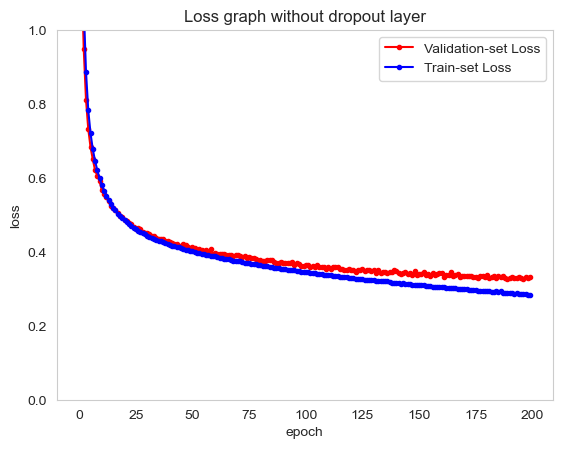

In [31]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

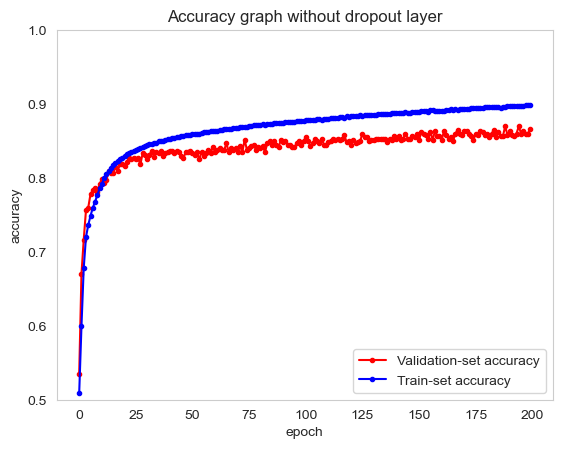

In [32]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

dropout layer가 없는 fully connected layer에서 200번 정도의 학습을 하니 train set의 accuracy는 올라가고, loss는 점점 떨어졌습니다. 그러나 validation set의 accuracy와 loss는 어느 정도 값에서 수렴함을 볼 수 있었습니다.
이렇게 오버피팅을 만든 환경에서 dropout layer를 추가한 뒤 나머지 환경은 같게 한 실험을 살펴보도록 하겠습니다.

In [33]:
# Q. dropout layer를 추가해보세요. (dropout 확률은 0.5로 지정해주세요.)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
  1/117 [..............................] - ETA: 37s - loss: 2.3025 - accuracy: 0.0938

2024-05-24 17:45:04.043462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 2s 10ms/step - loss: 2.0791 - accuracy: 0.4631 - val_loss: 1.6911 - val_accuracy: 0.5467
Epoch 2/200
  8/117 [=>............................] - ETA: 0s - loss: 1.7086 - accuracy: 0.4985

2024-05-24 17:45:05.314304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


117/117 [==============================] - 1s 7ms/step - loss: 1.4559 - accuracy: 0.5559 - val_loss: 1.2121 - val_accuracy: 0.6717
Epoch 3/200
117/117 [==============================] - 1s 12ms/step - loss: 1.1445 - accuracy: 0.6283 - val_loss: 0.9976 - val_accuracy: 0.7233
Epoch 4/200
117/117 [==============================] - 1s 8ms/step - loss: 0.9786 - accuracy: 0.6710 - val_loss: 0.8652 - val_accuracy: 0.7500
Epoch 5/200
117/117 [==============================] - 1s 9ms/step - loss: 0.8745 - accuracy: 0.7025 - val_loss: 0.7813 - val_accuracy: 0.7600
Epoch 6/200
117/117 [==============================] - 1s 7ms/step - loss: 0.8072 - accuracy: 0.7165 - val_loss: 0.7262 - val_accuracy: 0.7750
Epoch 7/200
117/117 [==============================] - 1s 8ms/step - loss: 0.7607 - accuracy: 0.7305 - val_loss: 0.6909 - val_accuracy: 0.7717
Epoch 8/200
117/117 [==============================] - 1s 7ms/step - loss: 0.7278 - accuracy: 0.7401 - val_loss: 0.6624 - val_accuracy: 0.7817
Epoch 9/20

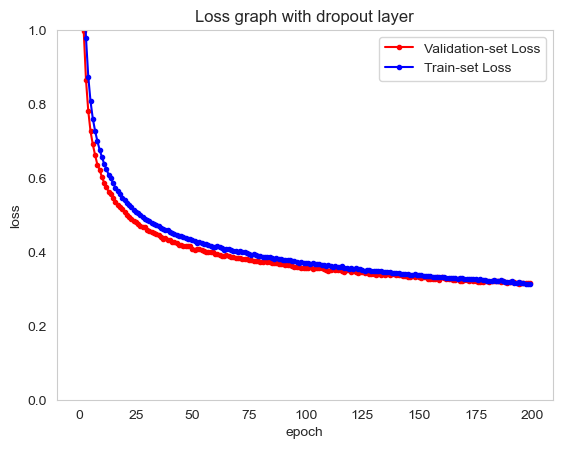

In [34]:
# Q. loss 값의 그래프를 그려봅시다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

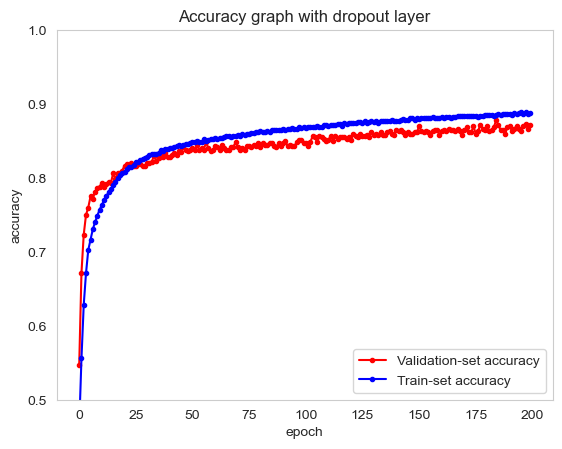

In [35]:
# Q. accuracy 값의 그래프를 그려봅시다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

좋은 데이터를 가지고 오버피팅을 만드는 환경이 조금 어렵긴 했지만, dropout layer 하나만으로도 오버피팅을 막고, 두 데이터 셋이 정확도도 비슷하게 나옴을 확인하였습니다. 사실 더 복잡한 네트워크나, 더 어려운 데이터의 경우에는 이러한 오버피팅이 더 자주 있는 일이므로, dropout layer를 추가하는 경우가 많습니다. 하지만 이 또한 확률 값이 파라미터로 들어가므로, 어떠한 값을 선택하느냐는 데이터와 네트워크에 따라 달린 일입니다.



## Batch Normalization

    논문 제목 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
    논문 발표 시점 : 2015년
    논문 링크 : 논문 PDF
        
(__batch normalization__과 internal covariate shift가 연관성이 없다는 반론도 있기 때문에, "이런 이야기도 있구나~" 하고 받아들이시면 됩니다.)

딥러닝에서 경사 하강법(gradient descent)으로 모델의 가중치를 업데이트할 때, 데이터셋 전체를 본 다음 업데이트하는 'Batch Gradient Descent'와 데이터 하나를 관찰할 때마다 업데이트하는 'Stochastic Gradient Descent' 방법이 있었죠. 이 둘의 절충안이 바로 데이터셋을 여러 개의 mini-batch로 쪼갠 다음 하나의 batch를 처리할 때마다 가중치를 업데이트하는 'Mini-batch Gradient Descent'입니다. 데이터셋을 mini-batch로 쪼개는 방법은 학습 속도와 안정성 모두를 잡았지만, 딥러닝 모델 안에서 데이터가 처리되면서 여러 개의 mini-batch들 사이에 데이터 분포의 차이가 생길 수 있다는 문제가 있었습니다. (이것이 internal covariate shift를 대략적으로 설명한 부분입니다.)

데이터 분포의 차이가 존재한다면 gradient 값의 차이도 있을 것이고, 같은 learning rate 값을 가지고 있더라도 gradient vanishing이나 gradient explode 문제가 생길 수 있습니다. batch normalization 기법은 각 mini-batch마다 평균과 분산을 계산하여 정규화(normalization)를 수행하고, `scale and shift` 변환을 적용하여 mini-batch들이 비슷한 데이터 분포를 가지도록 합니다.

논문에서 설명한 알고리즘을 아래에 적어보도록 하겠습니다.

Input: Values of x over a mini-batch: 
$B = \{ x_i, ..., x_m \}$  Parameters to be learned: $\gamma,\beta$

Output: 
$\{y_i = BN_{\gamma,\beta} (x_i)\}$

1. mini-batch mean :
$$\mu_B \leftarrow \frac{1}{m}\sum_{i=1}^{m} x_i$$

2. mini-batch variance :
$$ \sigma_B^2 \leftarrow \frac{1}{m}\sum_{i=1}^{m} (x_i - \mu_B)^2 $$

3. normalize :
$$ \hat x_i \leftarrow \frac{x_i - \mu_B}{sqrt(\sigma_B^2 + \epsilon)} $$

4. scale and shift :
$$ y_i \leftarrow \gamma \hat{x_i} + \beta \equiv BN_{\gamma, \beta}(x_i) $$

위 수식을 풀어서 설명해 드리면 batch normalization은 mini-batch의 평균과 분산을 구해서 입력 데이터를 정규화(normalize)하고, 이 값에 scale($\gamma$)과 shift($\beta$)를 추가한 것입니다. 결국 입력 데이터($x_i$)는 batch normalization을 거쳐 $y_i(=\gamma \hat{x_i} + \beta)$이 됩니다.

- 중간에 $\epsilon$이 붙은 이유는 분산($\sigma_B^2$)이 0일 경우 나눗셈 오류가 발생하는 것을 방지하기 위함입니다.
- $\gamma$와 $\beta$ 값은 학습 파라미터로 모델 학습이 진행되면서 가중치와 함께 업데이트됩니다.

### 실습
아무것도 하지 않은 fully connected layer와 batch normalization layer를 추가한 두 실험을 비교하고자 합니다. 중점적으로 봐야 할 내용은 정확도 비교와 속도의 차이입니다.

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [37]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20


2024-05-24 17:48:08.187312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 28ms/step - loss: 1.2726 - accuracy: 0.5998 - val_loss: 0.7756 - val_accuracy: 0.7221
Epoch 2/20
 8/21 [==========>...................] - ETA: 0s - loss: 0.7135 - accuracy: 0.7556

2024-05-24 17:48:08.853187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 0s 10ms/step - loss: 0.6711 - accuracy: 0.7734 - val_loss: 0.6076 - val_accuracy: 0.7996
Epoch 3/20
21/21 [==============================] - 0s 10ms/step - loss: 0.5684 - accuracy: 0.8099 - val_loss: 0.5456 - val_accuracy: 0.8187
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.5175 - accuracy: 0.8265 - val_loss: 0.5117 - val_accuracy: 0.8248
Epoch 5/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4872 - accuracy: 0.8346 - val_loss: 0.4848 - val_accuracy: 0.8335
Epoch 6/20
21/21 [==============================] - 0s 13ms/step - loss: 0.4650 - accuracy: 0.8411 - val_loss: 0.4739 - val_accuracy: 0.8354
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 0.4488 - accuracy: 0.8481 - val_loss: 0.4524 - val_accuracy: 0.8438
Epoch 8/20
21/21 [==============================] - 0s 10ms/step - loss: 0.4333 - accuracy: 0.8521 - val_loss: 0.4380 - val_accuracy: 0.8484
Epoch 9/20
21/21 [======

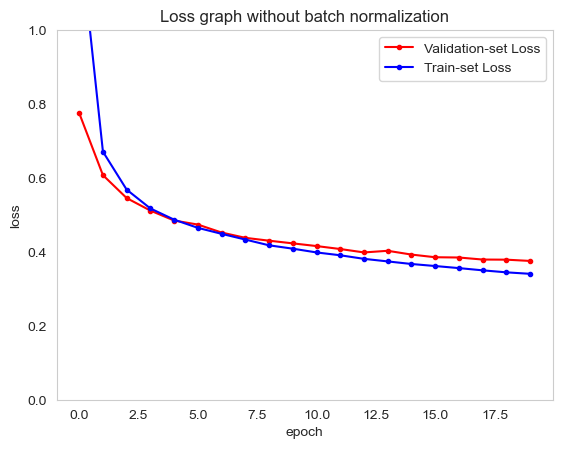

In [39]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

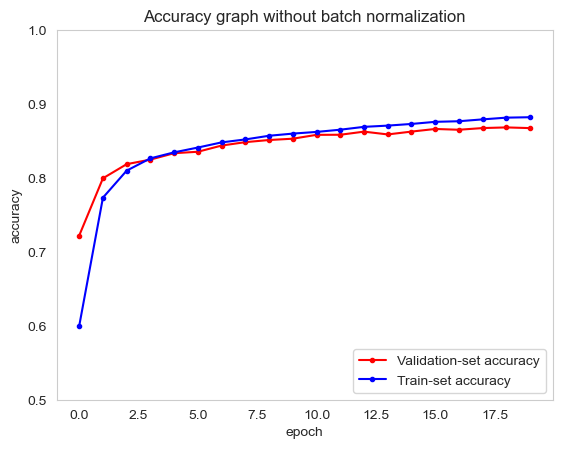

In [40]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

아래는 BatchNormalization layer를 추가한 실습입니다.

In [41]:
# Q. 두 개의 dense layer 사이에 batch normalization layer를 추가하는 코드입니다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 batch normalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20


2024-05-24 17:48:14.250200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.9536 - accuracy: 0.6869

2024-05-24 17:48:15.700413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 2s 53ms/step - loss: 0.9536 - accuracy: 0.6869 - val_loss: 1.0499 - val_accuracy: 0.6715
Epoch 2/20
21/21 [==============================] - 1s 25ms/step - loss: 0.5280 - accuracy: 0.8209 - val_loss: 0.8400 - val_accuracy: 0.7554
Epoch 3/20
21/21 [==============================] - 0s 15ms/step - loss: 0.4591 - accuracy: 0.8419 - val_loss: 0.7538 - val_accuracy: 0.7914
Epoch 4/20
21/21 [==============================] - 0s 13ms/step - loss: 0.4193 - accuracy: 0.8552 - val_loss: 0.6943 - val_accuracy: 0.8164
Epoch 5/20
21/21 [==============================] - 0s 14ms/step - loss: 0.3885 - accuracy: 0.8654 - val_loss: 0.6304 - val_accuracy: 0.8311
Epoch 6/20
21/21 [==============================] - 0s 14ms/step - loss: 0.3668 - accuracy: 0.8734 - val_loss: 0.5976 - val_accuracy: 0.8423
Epoch 7/20
21/21 [==============================] - 0s 13ms/step - loss: 0.3481 - accuracy: 0.8792 - val_loss: 0.5570 - val_accuracy: 0.8463
Epoch 8/20
21/21 [======

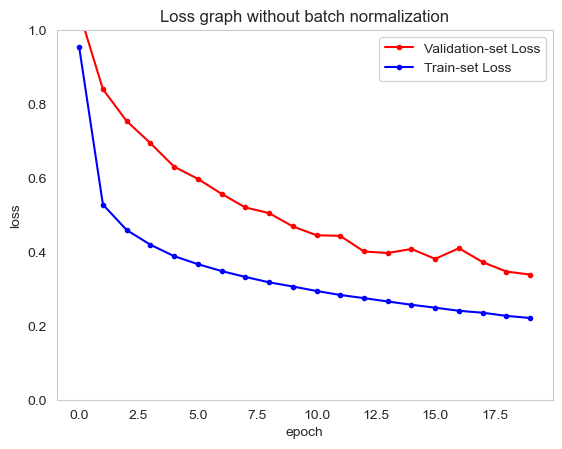

In [42]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

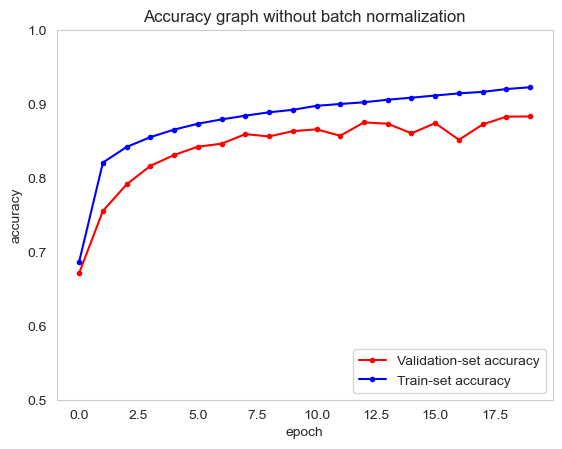

In [43]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## Q. L1 regularization과 L2 regularization의 공통점과 차이점은 무엇이었나요?
[공통점]
두 방법 모두 Lp norm 개념을 사용하고 있고, 오버피팅이 발생하지 않도록 모델에 제약 조건을 걸어줍니다.

[차이점]
L1 regularization(Lasso)은 L1 norm을 사용하며, 일부 coefficient 값을 0으로 보내기 때문에 차원 축소와 비슷한 역할을 합니다.
L2 regularization(Ridge)은 L2 norm을 사용하며, 계수를 0으로 보내지는 않지만 제곱 항이 있기 때문에 L1 regularization보다는 수렴 속도가 빠르다는 장점이 있습니다.